In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import pickle
DIM = (120,120)

In [26]:
def read_reshape_image(path: str):
    """
    """
    face = cv2.imread(path, 0)
    face_resized = cv2.resize(face, DIM, interpolation = cv2.INTER_AREA)
    return face_resized

show face with mask

(120, 120)


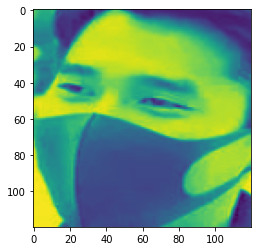

In [27]:
face_with_mask = read_reshape_image('../data/train/With_mask/image1,026.jpg')
print(face_with_mask.shape)
plt.imshow(face_with_mask)

show face without mask

(120, 120)


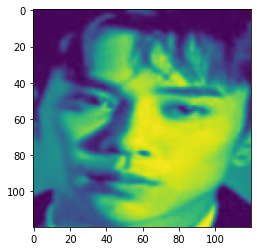

In [28]:
face_without_mask = read_reshape_image('../data/train/Without_mask/Faceimg1,015.jpg')
print(face_without_mask.shape)
plt.imshow(face_without_mask)

In [29]:
def load_label_and_shuffle_images(path_to_classes: str):
    """
    
    """
    # get all the file paths
    all_file_paths = [os.path.join(path, name) for path, subdirs, files in os.walk(path_to_classes) for name in files]
    # shuffle the file paths to shuffle the images
    random.seed(4) # to be able to reproduce the results
    random.shuffle(all_file_paths)
    # extract and label images
    print(f"Extracting {len(all_file_paths)} images")
    images = []
    labels = []
    for file_path in all_file_paths:
        try:
            image = read_reshape_image(file_path)
            label = file_path.split('/')[-2]
        except:
            continue
        images.append(image)
        labels.append([1, 0] if label=='With_mask' else [0, 1])
    return np.array(images)/255, np.array(labels)

In [30]:
def save_data(data, path):
    with open(path, "wb") as output_file:
        pickle.dump(data, output_file)

In [31]:
train_data, train_labels = load_label_and_shuffle_images('../data/train/')
test_data, test_labels = load_label_and_shuffle_images('../data/test/')
validation_data, validation_labels = load_label_and_shuffle_images('../data/val/')

Extracting 4102 images


libpng warning: iCCP: known incorrect sRGB profile


Extracting 1810 images
Extracting 962 images


In [32]:
save_data(train_data, '../clean_data/train_data.dat')
save_data(train_labels, '../clean_data/train_labels.dat')
save_data(test_data, '../clean_data/test_data.dat')
save_data(test_labels, '../clean_data/test_labels.dat')
save_data(validation_data, '../clean_data/validation_data.dat')
save_data(validation_labels, '../clean_data/validation_labels.dat')